# Project: Predict survival on the Titanic

## Explore the Data
The following steps are best tackled with pandas functions. If you prefer, you can also use basic Python commands.

### Step 1
Read the file train.csv into Python and print a few rows.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/titanic/train.csv')

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.groupby("Embarked")['Survived'].mean().plot.bar()

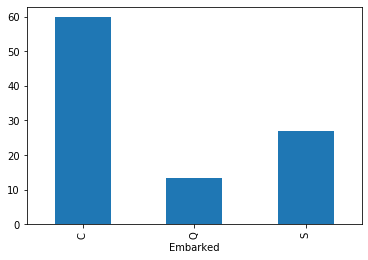

In [5]:
df.groupby("Embarked")['Fare'].mean().plot.bar()                                                    

In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Step 2
- Write a program that calculates the number of surviving passengers and prints it to the screen.
- Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [8]:
survive_or_die = df['Survived'].value_counts()
survive_or_die

0    549
1    342
Name: Survived, dtype: int64

In [9]:
df['Survived'].sum()

342

In [10]:
from matplotlib import pyplot as plt

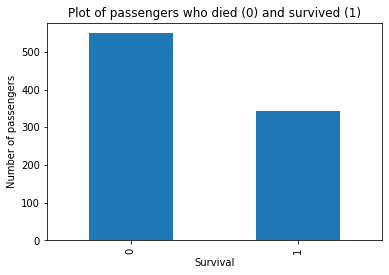

In [11]:
survive_or_die.plot.bar()
plt.xlabel('Survival')
plt.ylabel('Number of passengers')
plt.title('Plot of passengers who died (0) and survived (1)')
plt.show()

### Step 3
Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [12]:
df.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [13]:
df.groupby('Pclass')['Survived'].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [14]:
survived_1st = df.groupby('Pclass')['Survived'].value_counts()[1] / df.groupby('Pclass')['Survived'].count()[1] * 100

In [15]:
survived_1st

Survived
1    62.962963
0    37.037037
Name: Survived, dtype: float64

In [16]:
pd.DataFrame(survived_1st)

,Survived
Survived,
1,62.962963
0,37.037037


In [17]:
df2 = pd.DataFrame(df.groupby('Pclass')['Survived'].value_counts())
df2.stack().unstack(2)

Survived
Pclass Survived          
1      0               80
       1              136
2      0               97
       1               87
3      0              372
       1              119

##### Can do this for 2nd and 3rd class too:

In [18]:
survived_2nd = df.groupby('Pclass')['Survived'].value_counts()[2] / df.groupby('Pclass')['Survived'].count()[2] * 100
survived_2nd

Survived
0    52.717391
1    47.282609
Name: Survived, dtype: float64

In [19]:
survived_3rd = df.groupby('Pclass')['Survived'].value_counts()[3] / df.groupby('Pclass')['Survived'].count()[3] * 100
survived_3rd

Survived
0    75.763747
1    24.236253
Name: Survived, dtype: float64

### Step 4

- Create a bar plot with separate bars for male/female passengers 

In [20]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [21]:
male_female = df.groupby('Sex')['Survived'].value_counts()
male_female

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

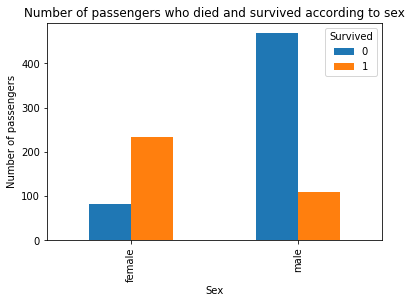

In [22]:
male_female.unstack(1).plot.bar()
plt.xlabel("Sex")
plt.ylabel("Number of passengers")
plt.title("Number of passengers who died and survived according to sex")
plt.show()

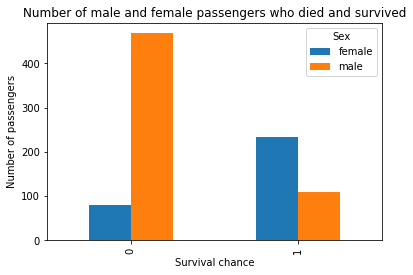

In [23]:
male_female.unstack(0).plot.bar()
plt.xlabel("Survival chance")
plt.ylabel("Number of passengers")
plt.title("Number of male and female passengers who died and survived")
plt.show()

- Create a bar plot with separate bars for 1st/2nd/3rd class passengers.

In [24]:
first_second_third = df.groupby('Pclass')['Survived'].value_counts().unstack(1)

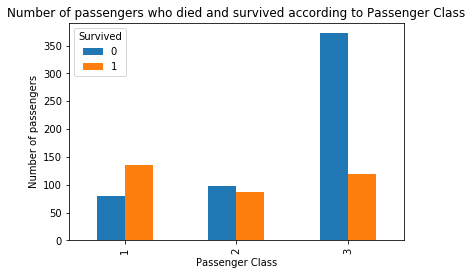

In [25]:
first_second_third.plot.bar()
plt.xlabel("Passenger Class")
plt.ylabel("Number of passengers")
plt.title("Number of passengers who died and survived according to Passenger Class")
plt.show()

### Step 5
- Calculate the average age for all passengers. Discard passengers with missing age.
- Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

In [26]:
df[['Age']].dropna().mean()

Age    29.699118
dtype: float64

In [27]:
df['Age'].mean()

29.69911764705882

In [28]:
df['Age'].dropna().head(10)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
Name: Age, dtype: float64

In [29]:
hist_all_pass = df['Age'].dropna()

In [30]:
from matplotlib import pyplot as plt

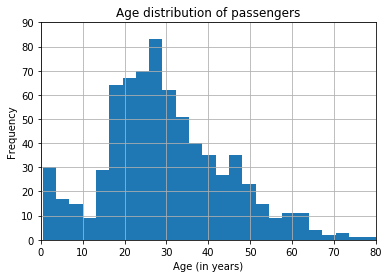

In [31]:
hist_all_pass.hist(bins=25, histtype = 'bar')
plt.title('Age distribution of passengers')
plt.xlabel('Age (in years)')
plt.ylabel('Frequency')
plt.axis([0,80,0,90]) # First numbers are the x-axis, 2nd bunch of numbers are the y-axis
plt.show()

In [32]:
df_died = df[df['Survived'] == 0]
df_died = df_died['Age'].dropna()
df_died.head()

0     22.0
4     35.0
6     54.0
7      2.0
12    20.0
Name: Age, dtype: float64

In [33]:
df_survived = df[df['Survived'] == 1]
df_survived = df_survived['Age'].dropna()
df_survived.head()

1    38.0
2    26.0
3    35.0
8    27.0
9    14.0
Name: Age, dtype: float64

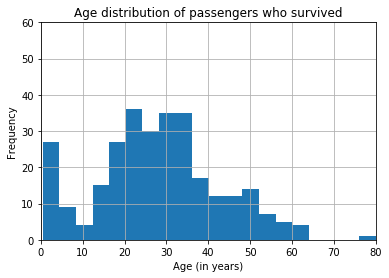

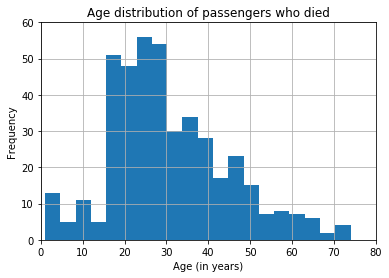

In [34]:
df_survived.hist(bins=20)
plt.title('Age distribution of passengers who survived')
plt.xlabel('Age (in years)')
plt.ylabel('Frequency')
plt.axis([0,80,0,60]) # First numbers are the x-axis, 2nd bunch of numbers are the y-axis
plt.show()

df_died.hist(bins=20)
plt.title('Age distribution of passengers who died')
plt.xlabel('Age (in years)')
plt.ylabel('Frequency')
plt.axis([0,80,0,60]) # First numbers are the x-axis, 2nd bunch of numbers are the y-axis

plt.show()

import seaborn as sns

seaborn.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, *)¶

https://seaborn.pydata.org/generated/seaborn.violinplot.html

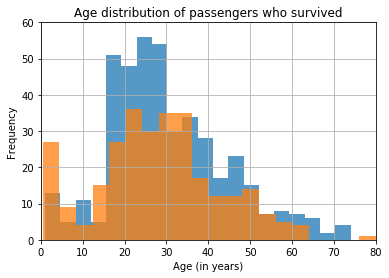

In [35]:
df_died.hist(bins=20, alpha=0.75)
df_survived.hist(bins=20, alpha=0.75)

plt.title('Age distribution of passengers who survived')
plt.xlabel('Age (in years)')
plt.ylabel('Frequency')
plt.axis([0,80,0,60]) # First numbers are the x-axis, 2nd bunch of numbers are the y-axis
plt.show()


### Step 6
Calculate the average age for survived and drowned passengers separately.


In [36]:
passenger_sums = df.groupby('Survived')['Age'].sum()
pd.DataFrame(passenger_sums).rename(columns= {'Age': 'Total age of all passengers'})

,Total age of all passengers
Survived,
0,12985.50
1,8219.67


In [37]:
passenger_count = df.groupby('Survived')['Age'].count()
pd.DataFrame(passenger_count).rename(columns= {'Age':'Count'})

,Count
Survived,
0,424
1,290


In [38]:
age_drowned = passenger_sums[0]/passenger_count[0]
age_drowned

30.62617924528302

In [39]:
age_survived = passenger_sums[1]/passenger_count[1]
age_survived

28.343689655172415

### Step 7
Replace missing age values by the mean age.

In [40]:
age_mean = round(df['Age'].mean(), 1)

In [41]:
age_mean

29.7

In [42]:
df2 = df.fillna(age_mean)

In [43]:
df2['Age'].mean()

29.69929292929293

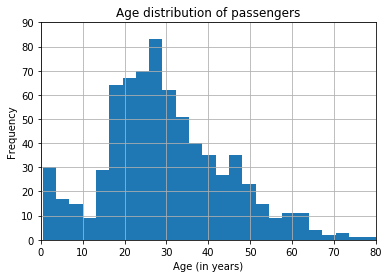

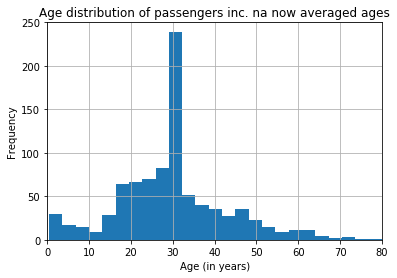

In [44]:
hist_all_pass.hist(bins=25, histtype = 'bar')
plt.title('Age distribution of passengers')
plt.xlabel('Age (in years)')
plt.ylabel('Frequency')
plt.axis([0,80,0,90]) # First numbers are the x-axis, 2nd bunch of numbers are the y-axis
plt.show()

df2['Age'].hist(bins=25)
plt.title('Age distribution of passengers inc. na now averaged ages')
plt.xlabel('Age (in years)')
plt.ylabel('Frequency')
plt.axis([0,80,0,250]) # First numbers are the x-axis, 2nd bunch of numbers are the y-axis
plt.show()

### Step 8
Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [45]:
male_female = df.groupby('Sex')['Survived'].value_counts().unstack(0)
male_female = male_female.reset_index()
male_female

Sex,Survived,female,male
0,0,81,468
1,1,233,109


In [46]:
first_second_third = df.groupby('Pclass')['Survived'].value_counts().unstack(0)
first_second_third = first_second_third.reset_index()
first_second_third

Pclass,Survived,1,2,3
0,0,80,97,372
1,1,136,87,119


In [47]:
merged = male_female.merge(first_second_third, on=male_female.index, how='left',
                           suffixes=('','_2')).drop('key_0', axis=1)
table = merged.drop(columns='Survived_2').set_index('Survived')
table

,female,male,1,2,3
Survived,,,,,
0,81,468,80,97,372
1,233,109,136,87,119


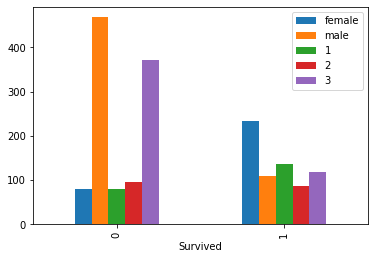

In [48]:
table.plot.bar()

## Feature Engineering
- easy: scale the data: scale your numerical quantities - eg Age, Fare
- medium: apply one-hot encoding (pd.get_dummies) - do that on categorical data eg Sex, Embarked 
- hard: create combined and polynomial features

In [49]:
df['Age'].fillna(age_mean, inplace=True)

In [50]:
from sklearn.preprocessing import MinMaxScaler 

In [51]:
minmax = MinMaxScaler()

In [52]:
df['Age_Scaled'] = minmax.fit_transform(df[['Age']])

In [53]:
df['Fare_Scaled'] = minmax.fit_transform(df[['Fare']])

In [54]:
female_male = pd.get_dummies(df['Sex'])

df['Male'] = female_male['male']

In [55]:
embarked_dummied = pd.get_dummies(df['Embarked'])

df_merged = df.merge(embarked_dummied, on=df.index, how='left').drop(columns='key_0')

In [56]:
df_merged['Family'] = df['SibSp'] + df['Parch']

In [57]:
df_merged.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Scaled,Fare_Scaled,Male,C,Q,S,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.271174,0.014151,1,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.472229,0.139136,0,1,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.321438,0.015469,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.434531,0.103644,0,0,0,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.434531,0.015713,1,0,0,1,0


## Build a Logistic Regression model
- easy: use the Logistic Regression in scikit
- medium: inspect the coefficients of input features
- hard: use the Logistic Regression in statsmodels and understand the output

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X = df_merged[['Male', 'Pclass', 'Age_Scaled', 'Fare_Scaled', 'Family','C','Q','S']]
y = df_merged['Survived']

print(len(X) == len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

True


In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 8), (223, 8), (668,), (223,))

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
m = LogisticRegression()
m.fit(X_train,y_train)
print("train score: " ,m.score(X_train,y_train))
print("test score: ", m.score(X_test, y_test))

train score:  0.7979041916167665
test score:  0.8026905829596412


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
m.coef_, m.intercept_

(array([[-2.47051388, -0.77621419, -1.33178276,  0.96327782, -0.15516873,
          1.0415692 ,  0.69406095,  0.5351915 ]]), array([2.71633583]))

In [64]:
f'a1:{m.coef_[0][0]},  a2: {m.coef_[0][1]},  a3: {m.coef_[0][2]},  a4: {m.coef_[0][3]},  a5:{m.coef_[0][4]},  a6: {m.coef_[0][5]},  a7: {m.coef_[0][6]},  a8: {m.coef_[0][7]},  b:{m.intercept_[0]}'

'a1:-2.4705138759634413,  a2: -0.7762141885174091,  a3: -1.3317827574842664,  a4: 0.96327781926544,  a5:-0.1551687345328183,  a6: 1.041569203335479,  a7: 0.6940609515503012,  a8: 0.5351914963542173,  b:2.716335832072882'

## Evaluate your model
- easy: calculate an accuracy
- medium: calculate precision and recall
- hard: draw an ROC curve or precision-recall plot

In [65]:
ypred = m.predict(X_train)

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Accuracy score: ', accuracy_score(y_train,ypred))
print('Precision score: ', precision_score(y_train,ypred))
print('Recall score: ', recall_score(y_train,ypred))

Accuracy score:  0.7979041916167665
Precision score:  0.7543103448275862
Recall score:  0.691699604743083


## Validate your model
- easy: split your dataset in training and test data
- medium: do a cross-validation
- hard: calculate a confidence interval with bootstrapping

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
cross_val_score(m, X_train, y_train, cv=5)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

array([0.7761194 , 0.85074627, 0.7761194 , 0.76691729, 0.81203008])

In [69]:
scores = cross_val_score(m, X_train, y_train, cv=5)
scores.mean(), scores.std()

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

(0.7963864886095836, 0.031271873891306444)

In [70]:
m.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
m.fit(X_train,y_train)
print("train score: " ,m.score(X_train,y_train))
print("test score: ", m.score(X_test, y_test))

train score:  0.7979041916167665
test score:  0.8026905829596412


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
import numpy as np

In [73]:
predict = pd.read_csv('data/titanic/predict.csv')

predict['Age'].fillna(age_mean, inplace=True)

predict['Fare'].fillna(predict['Fare'].mean(), inplace=True)

minmax = MinMaxScaler()

predict['Age_Scaled'] = minmax.fit_transform(predict[['Age']])

predict['Fare_Scaled'] = minmax.fit_transform(predict[['Fare']])

predict_female_male = pd.get_dummies(predict['Sex'])

predict['Male'] = predict_female_male['male']

embarked_dummied = pd.get_dummies(predict['Embarked'])

predict_merged = predict.merge(embarked_dummied, on=predict.index, how='left').drop(columns='key_0')

predict_merged['Family'] = predict['SibSp'] + predict['Parch']


In [74]:
type(predict['Male'])

pandas.core.series.Series

In [75]:
predict_merged.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Scaled,Fare_Scaled,Male,C,Q,S,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.452723,0.015282,1,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.617566,0.013663,0,0,0,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.815377,0.018909,1,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.353818,0.016908,1,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.287881,0.023984,0,0,0,1,2


In [76]:
Xpredict = predict_merged[['Male', 'Pclass', 'Age_Scaled', 'Fare_Scaled', 'Family','C','Q','S']]

In [77]:
ypred_prediction = m.predict(Xpredict)

In [78]:
Submission = pd.DataFrame(data = ypred_prediction, index=predict['PassengerId'], columns = ['Survived'])

In [79]:
Submission.to_csv('Submission.csv')

In [80]:
Submission.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


## Submit predictions to Kaggle
Submit predictions for new data to the Titanic competition to Kaggle

- easy: reach 70% accuracy
- medium: reach 75% accuracy
- hard: reach 80% accuracy